# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
#Extract Data from each Year's Stats Table
df68 = pd.read_csv('NASL.csv', header=2, nrows=23, thousands=',')
df68['Year'] = 1968

df69 = pd.read_csv('NASL.csv', header=33, nrows=5, thousands=',')
df69['Year'] = 1969

df70 = pd.read_csv('NASL.csv', header=44, nrows=8, thousands=',')
df70['Year'] = 1970

df71 = pd.read_csv('NASL.csv', header=60, nrows=10, thousands=',')
df71['Year'] = 1971

df72 = pd.read_csv('NASL.csv', header=79, nrows=10, thousands=',')
df72['Year'] = 1972

df73 = pd.read_csv('NASL.csv', header=95, nrows=13, thousands=',')
df73['Year'] = 1973

df74 = pd.read_csv('NASL.csv', header=113, nrows=21, thousands=',')
df74['Year'] = 1974

df75 = pd.read_csv('NASL.csv', header=140, nrows=26, thousands=',')
df75['Year'] = 1975

df76 = pd.read_csv('NASL.csv', header=175, nrows=27, thousands=',')
df76['Year'] = 1976

df77 = pd.read_csv('NASL.csv', header=209, nrows=25, thousands=',')
df77['Year'] = 1977

df78 = pd.read_csv('NASL.csv', header=241, nrows=35, thousands=',')
df78['Year'] = 1978

df79 = pd.read_csv('NASL.csv', header=283, nrows=35, thousands=',')
df79['Year'] = 1979

df80 = pd.read_csv('NASL.csv', header=325, nrows=35, thousands=',')
df80['Year'] = 1980

df81 = pd.read_csv('NASL.csv', header=366, nrows=29, thousands=',')
df81['Year'] = 1981

df82 = pd.read_csv('NASL.csv', header=401, nrows=18, thousands=',')
df82['Year'] = 1982

df83 = pd.read_csv('NASL.csv', header=441, nrows=16, thousands=',')
df83['Year'] = 1983

df84 = pd.read_csv('NASL.csv', header=463, nrows=16, thousands=',')
df84['Year'] = 1984

In [3]:
#Append and Clean
stats_by_year = df68.append([df69, df70, df71, df72, df73, df74, df75, df76, df77, df78, df79, df80, df81, df82, df83, df84])
stats_by_year = stats_by_year[(~stats_by_year.Team.str.contains('Division|Team$|Conference'))]
stats_by_year['Attendance'] = stats_by_year['Attendance'].str.replace(',', '').astype(float)

stats_by_year.loc[(stats_by_year['Year']==1969)&(stats_by_year['Team']=='Kansas City Spurs'), 'Attendance'] = 4273
stats_by_year.loc[(stats_by_year['Year']==1969)&(stats_by_year['Team']=='Atlanta Chiefs'), 'Attendance'] = 3371
stats_by_year.loc[(stats_by_year['Year']==1969)&(stats_by_year['Team']=='Dallas Tornado'), 'Attendance'] = 2923
stats_by_year.loc[(stats_by_year['Year']==1969)&(stats_by_year['Team']=='St. Louis Stars'), 'Attendance'] = 2274
stats_by_year.loc[(stats_by_year['Year']==1969)&(stats_by_year['Team']=='Baltimore Bays'), 'Attendance'] = 1601

stats_by_year = stats_by_year[['Year','Team','Attendance']]

stats_by_year.loc[(stats_by_year['Year']==1981)&(stats_by_year['Team']=='Washington Diplomats'), 'Team'] = 'Washington Diplomats (1981)'
stats_by_year.loc[(stats_by_year['Year']>=1979)&(stats_by_year['Team']=='Atlanta Chiefs'), 'Team'] = 'Atlanta Chiefs (1979)'
stats_by_year.loc[(stats_by_year['Year']==1978)&(stats_by_year['Team']=='Colorado Caribous'), 'Team'] = 'Caribous of Colorado'
stats_by_year.loc[(stats_by_year['Year']==1972)&(stats_by_year['Team']=='Atlanta Chief'), 'Team'] = 'Atlanta Chiefs'

In [4]:
#Extract Data from Team Evolution Table
evolution = pd.read_csv('TeamEvolution.csv', header=4)

evolution = evolution[(~evolution['NASL Evolution of Franchise'].str.contains('–'))][['Team', 'NASL Evolution of Franchise']]
evolution = evolution.replace(to_replace=r'\*', value = '', regex=True)

In [5]:
#Merge
mergedDF = stats_by_year.merge(evolution, how='left', on='Team')
mergedDF = mergedDF.set_index(np.arange(len(mergedDF)))

In [6]:
#If Team did not "evolve", keep Team name
for i in range(len(mergedDF)):
    #print (mergedDF.loc[i, 'NASL Evolution of Franchise'])
    if type(mergedDF.loc[i, 'NASL Evolution of Franchise']) == float:
        mergedDF.loc[i, 'NASL Evolution of Franchise'] = mergedDF.loc[i, 'Team']
        #print (mergedDF.loc[i, 'NASL Evolution of Franchise'])
        

In [7]:
mergedDF.pivot(index='Year', columns='NASL Evolution of Franchise', values = 'Attendance')

NASL Evolution of Franchise,Baltimore Bays,Bicentennials→Connecticut→Stompers→Drillers,Boston Beacons,Boston Minutemen,Caribous→Chiefs (1979),Chicago Mustangs,Chicago Sting,Chiefs→Apollos,Cleveland Stokers,Comets→Jaws→Quicksilvers→Sockers,Dallas Tornado,Darts→Gatos→Toros→Strikers→Minnesota,Detroit Cougars,Dynamos→Kicks,Earthquakes→Golden Bay,Express→Diplomats (1981),Fury→Manic,Houston Hurricane,Houston Stars,Kansas City Spurs,Los Angeles Aztecs,Los Angeles Wolves,Metros→Metros-Croatia→Blizzard,Montreal Olympique,New York Generals,New York→Cosmos→New York,Oakland Clippers,Philadelphia Atoms,Portland Timbers,Rochester Lancers,Rogues→Boomers,San Diego Toros,San Jose Earthquakes→Golden Bay,Seattle Sounders,Stars→Surf,Tampa Bay Rowdies,Tea Men→Jacksonville,Team America,Thunder→Team Hawaii→Roughnecks,Toronto Falcons,Vancouver Royals,Vancouver Whitecaps,Washington Diplomats,Washington Whips
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1968,4628.0,NaN,4004.0,NaN,NaN,2463.0,NaN,5794.0,4305.0,NaN,2927.0,NaN,4266.0,NaN,NaN,NaN,NaN,NaN,3246.0,8510.0,NaN,2441.0,NaN,NaN,5605.0,NaN,3700.0,NaN,NaN,NaN,NaN,4245.0,NaN,NaN,5388.0,NaN,NaN,NaN,NaN,5336.0,6197.0,NaN,NaN,6840.0
1969,1601.0,NaN,NaN,NaN,NaN,NaN,NaN,3371.0,NaN,NaN,2923.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3002.0,NaN,NaN,2228.0,3894.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2398.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4506.0,NaN,NaN,NaN,NaN,2745.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4275.0,NaN,NaN,3326.0,3262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5993.0,2440.0,NaN,4517.0,NaN,NaN,NaN,5871.0,NaN,NaN,NaN,NaN,3579.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5034.0,NaN,NaN,4093.0,2112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7173.0,2308.0,NaN,4282.0,NaN,NaN,NaN,5505.0,NaN,NaN,NaN,NaN,7773.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3317.0,NaN,NaN,7474.0,5477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5961.0,3856.0,NaN,5782.0,NaN,11501.0,NaN,4069.0,NaN,NaN,NaN,NaN,6337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974,NaN,NaN,NaN,9642.0,NaN,NaN,NaN,NaN,NaN,4139.0,8359.0,7340.0,NaN,4840.0,16584.0,NaN,NaN,NaN,NaN,NaN,5098.0,NaN,3458.0,NaN,NaN,3578.0,NaN,11784.0,NaN,5908.0,NaN,NaN,NaN,13454.0,7374.0,NaN,NaN,NaN,NaN,NaN,NaN,10979.0,4975.0,NaN
1975,NaN,3720.0,NaN,4422.0,NaN,NaN,4330.0,NaN,NaN,2641.0,4630.0,4921.0,NaN,3654.0,17927.0,NaN,NaN,NaN,NaN,NaN,8307.0,NaN,6271.0,NaN,NaN,10450.0,NaN,6848.0,14503.0,5333.0,NaN,NaN,NaN,16826.0,6071.0,10728.0,NaN,NaN,4412.0,NaN,NaN,7579.0,8373.0,NaN
1976,NaN,3420.0,NaN,2571.0,NaN,NaN,5801.0,NaN,NaN,6320.0,14095.0,3070.0,NaN,23121.0,19826.0,NaN,NaN,NaN,NaN,NaN,8027.0,NaN,5555.0,NaN,NaN,18227.0,NaN,5912.0,20515.0,5159.0,NaN,NaN,NaN,23828.0,6150.0,16452.0,NaN,NaN,5064.0,NaN,NaN,8655.0,6011.0,NaN


In [8]:
#Get Attendance Ranges for Teams other than NY Cosmos
otherTeams = mergedDF.pivot(index='Year', columns='NASL Evolution of Franchise', values = 'Attendance')
otherTeams = otherTeams.drop('New York→Cosmos→New York',1)
otherTeams['Average Attendance'] = otherTeams.mean(axis=1)
otherTeams['Max Attendance'], otherTeams['Min Attendance'] = otherTeams.max(axis=1), otherTeams.min(axis=1)
otherTeams

NASL Evolution of Franchise,Baltimore Bays,Bicentennials→Connecticut→Stompers→Drillers,Boston Beacons,Boston Minutemen,Caribous→Chiefs (1979),Chicago Mustangs,Chicago Sting,Chiefs→Apollos,Cleveland Stokers,Comets→Jaws→Quicksilvers→Sockers,Dallas Tornado,Darts→Gatos→Toros→Strikers→Minnesota,Detroit Cougars,Dynamos→Kicks,Earthquakes→Golden Bay,Express→Diplomats (1981),Fury→Manic,Houston Hurricane,Houston Stars,Kansas City Spurs,Los Angeles Aztecs,Los Angeles Wolves,Metros→Metros-Croatia→Blizzard,Montreal Olympique,New York Generals,Oakland Clippers,Philadelphia Atoms,Portland Timbers,Rochester Lancers,Rogues→Boomers,San Diego Toros,San Jose Earthquakes→Golden Bay,Seattle Sounders,Stars→Surf,Tampa Bay Rowdies,Tea Men→Jacksonville,Team America,Thunder→Team Hawaii→Roughnecks,Toronto Falcons,Vancouver Royals,Vancouver Whitecaps,Washington Diplomats,Washington Whips,Average Attendance,Max Attendance,Min Attendance
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1968,4628.0,NaN,4004.0,NaN,NaN,2463.0,NaN,5794.0,4305.0,NaN,2927.0,NaN,4266.0,NaN,NaN,NaN,NaN,NaN,3246.0,8510.0,NaN,2441.0,NaN,NaN,5605.0,3700.0,NaN,NaN,NaN,NaN,4245.0,NaN,NaN,5388.0,NaN,NaN,NaN,NaN,5336.0,6197.0,NaN,NaN,6840.0,4699.705882,8510.0,2441.0
1969,1601.0,NaN,NaN,NaN,NaN,NaN,NaN,3371.0,NaN,NaN,2923.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2888.400000,4273.0,1601.0
1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3002.0,NaN,NaN,2228.0,3894.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2398.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4506.0,NaN,NaN,NaN,NaN,2745.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3128.833333,4506.0,2228.0
1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4275.0,NaN,NaN,3326.0,3262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5993.0,2440.0,NaN,NaN,NaN,NaN,5871.0,NaN,NaN,NaN,NaN,3579.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4106.571429,5993.0,2440.0
1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5034.0,NaN,NaN,4093.0,2112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7173.0,2308.0,NaN,NaN,NaN,NaN,5505.0,NaN,NaN,NaN,NaN,7773.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4856.857143,7773.0,2112.0
1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3317.0,NaN,NaN,7474.0,5477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5961.0,3856.0,NaN,NaN,11501.0,NaN,4069.0,NaN,NaN,NaN,NaN,6337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5999.000000,11501.0,3317.0
1974,NaN,NaN,NaN,9642.0,NaN,NaN,NaN,NaN,NaN,4139.0,8359.0,7340.0,NaN,4840.0,16584.0,NaN,NaN,NaN,NaN,NaN,5098.0,NaN,3458.0,NaN,NaN,NaN,11784.0,NaN,5908.0,NaN,NaN,NaN,13454.0,7374.0,NaN,NaN,NaN,NaN,NaN,NaN,10979.0,4975.0,NaN,8138.142857,16584.0,3458.0
1975,NaN,3720.0,NaN,4422.0,NaN,NaN,4330.0,NaN,NaN,2641.0,4630.0,4921.0,NaN,3654.0,17927.0,NaN,NaN,NaN,NaN,NaN,8307.0,NaN,6271.0,NaN,NaN,NaN,6848.0,14503.0,5333.0,NaN,NaN,NaN,16826.0,6071.0,10728.0,NaN,NaN,4412.0,NaN,NaN,7579.0,8373.0,NaN,7447.157895,17927.0,2641.0
1976,NaN,3420.0,NaN,2571.0,NaN,NaN,5801.0,NaN,NaN,6320.0,14095.0,3070.0,NaN,23121.0,19826.0,NaN,NaN,NaN,NaN,NaN,8027.0,NaN,5555.0,NaN,NaN,NaN,5912.0,20515.0,5159.0,NaN,NaN,NaN,23828.0,6150.0,16452.0,NaN,NaN,5064.0,NaN,NaN,8655.0,6011.0,NaN,9976.421053,23828.0,2571.0


In [9]:
#Get Attendance for NY Cosmos
cosmos = mergedDF.pivot(index='Year', columns='NASL Evolution of Franchise', values = 'Attendance')['New York→Cosmos→New York']
cosmos

Year
1968        NaN
1969        NaN
1970        NaN
1971     4517.0
1972     4282.0
1973     5782.0
1974     3578.0
1975    10450.0
1976    18227.0
1977    34142.0
1978    47856.0
1979    46690.0
1980    42754.0
1981    34835.0
1982    28749.0
1983    27242.0
1984    12817.0
Name: New York→Cosmos→New York, dtype: float64

<IPython.core.display.Javascript object>


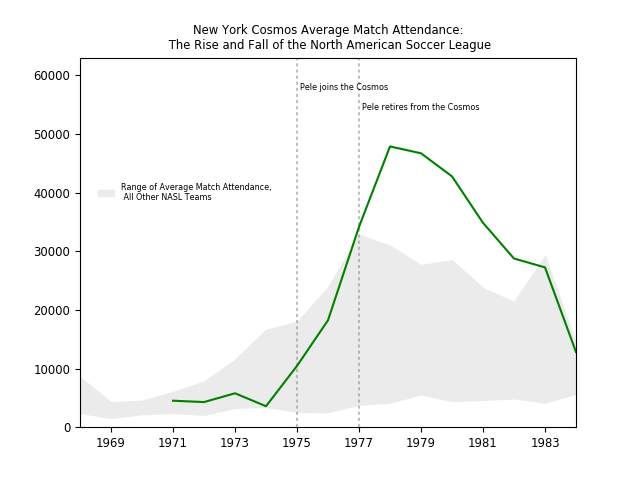

(0, 63000)

In [10]:
plt.figure()
plt.axvline(1975, color="gray", alpha=.5, ls=':')
plt.axvline(1977, color="gray", alpha=.5, ls=':')

ax = plt.gca()
ax.fill_between(otherTeams.index, otherTeams['Min Attendance'], otherTeams['Max Attendance'],  
                color='.92', label='Range of Average Match Attendance,\n All Other NASL Teams')

ax.legend(loc=(.03,.6), frameon=False, fontsize = 'xx-small')
plt.plot(cosmos, color='green')

plt.annotate('Pele joins the Cosmos', xy=(1975, 50000),  xytext=(1975.1, 57500), fontsize = 'xx-small')
plt.annotate('Pele retires from the Cosmos', xy=(1977, 50000),  xytext=(1977.1, 54000), fontsize = 'xx-small')

plt.xticks(np.arange(1969, 1984, 2), fontsize='small')
plt.yticks(fontsize='small')
plt.title('New York Cosmos Average Match Attendance:\n The Rise and Fall of the North American Soccer League', fontsize='small')

plt.xlim(1968,1984)
plt.ylim(0,63000)

<IPython.core.display.Javascript object>


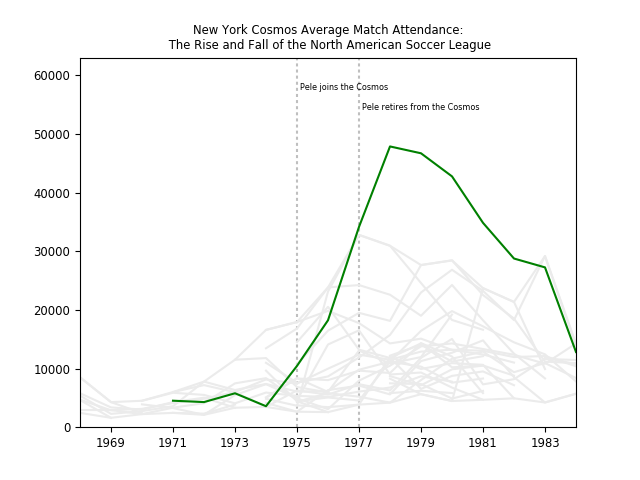

(0, 63000)

In [11]:
plt.figure()
plt.axvline(1975, color="gray", alpha=.5, ls=':')
plt.axvline(1977, color="gray", alpha=.5, ls=':')

#ax = plt.gca()
#ax.fill_between(otherTeams.index, otherTeams['Min Attendance'], otherTeams['Max Attendance'],  
                #color='.92', label='Range of Average Match Attendance,\n All Other NASL Teams')

#ax.legend(loc=(.03,.6), frameon=False, fontsize = 'xx-small')
plt.plot(otherTeams.index, otherTeams, color='.92')
plt.plot(cosmos, color='green')

plt.annotate('Pele joins the Cosmos', xy=(1975, 50000),  xytext=(1975.1, 57500), fontsize = 'xx-small')
plt.annotate('Pele retires from the Cosmos', xy=(1977, 50000),  xytext=(1977.1, 54000), fontsize = 'xx-small')

plt.xticks(np.arange(1969, 1984, 2), fontsize='small')
plt.yticks(fontsize='small')
plt.title('New York Cosmos Average Match Attendance:\n The Rise and Fall of the North American Soccer League', fontsize='small')

plt.xlim(1968,1984)
plt.ylim(0,63000)